<h1>Key Levels Detection</h1>

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv("./Data/History/XAUUSD_M5_2023.csv")
df['Timestamp'] = pd.to_datetime(df['Date'].astype(str) +' ' + df['Timestamp'], format='%Y%m%d %H:%M:%S')

# Drop the original Date and Timestamp columns and changing the order the columns
df = df.drop(columns=['Date'])
df.rename(columns={'Timestamp': 'Time'}, inplace=True)

df.head(10)


,Time,Open,High,Low,Close,Volume
0,2023-01-03 00:00:00,1826.837,1829.958,1825.967,1826.217,0.57740
1,2023-01-03 00:15:00,1826.197,1828.997,1823.287,1827.847,0.67794
2,2023-01-03 00:30:00,1827.807,1828.347,1826.965,1827.735,0.26514
3,2023-01-03 00:45:00,1827.715,1829.305,1827.618,1829.295,0.13008
4,2023-01-03 01:00:00,1829.285,1831.995,1828.705,1831.545,0.15267
5,2023-01-03 01:15:00,1831.545,1832.105,1830.145,1831.208,0.16941
6,2023-01-03 01:30:00,1831.218,1831.908,1831.108,1831.208,0.28912
7,2023-01-03 01:45:00,1831.175,1831.448,1830.085,1830.555,0.30291
8,2023-01-03 02:00:00,1830.565,1832.305,1827.437,1829.465,0.40412
9,2023-01-03 02:15:00,1829.485,1830.745,1826.685,1828.105,0.53816


In [20]:
from sup_res_id import pivotid


    
df['pivot'] = df.apply(lambda x: pivotid(df, x.name, 5, 5), axis=1)
# df = df.reset_index()
df[df['pivot'] == 2].loc[df['index'] > 2300]



,index,Time,Open,High,Low,Close,Volume,pivot,support,resistance
2303,2303,2023-02-07 04:45:00,1873.075,1875.505,1872.595,1872.685,0.14802,2,NaN,1875.505
2314,2314,2023-02-07 07:30:00,1874.325,1876.815,1874.175,1876.028,0.15236,2,NaN,NaN
2325,2325,2023-02-07 10:15:00,1875.255,1877.808,1874.995,1876.018,0.78568,2,NaN,1877.808
2339,2339,2023-02-07 13:45:00,1872.485,1872.685,1869.827,1870.355,0.56277,2,NaN,NaN
2352,2352,2023-02-07 17:00:00,1879.247,1879.985,1874.095,1875.025,0.55731,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
23484,23484,2023-12-29 08:00:00,2072.625,2074.645,2072.258,2074.485,0.57924,2,NaN,2074.645
23505,23505,2023-12-29 13:15:00,2067.335,2068.765,2066.345,2067.215,0.34655,2,NaN,2068.765
23521,23521,2023-12-29 17:15:00,2065.295,2067.895,2064.325,2064.505,1.15771,2,NaN,NaN
23527,23527,2023-12-29 18:45:00,2067.725,2068.065,2065.335,2066.535,0.31824,2,NaN,2068.065


In [7]:
import finplot as fplt

df['support'] = df.loc[df['pivot']==1, 'Low']
df['resistance'] = df.loc[df['pivot']==2, 'High']

def plotHistory():
    # Create the plot
    ax = fplt.create_plot('XAUUSD')

    # Plot candlesticks
    candles = df[['Time', 'Open', 'Close', 'High', 'Low']]
    fplt.candlestick_ochl(candles, ax=ax)

    # Overlay volume on the top plot
    volumes = df[['Time', 'Open', 'Close', 'Volume']]
    fplt.volume_ocv(volumes, ax=ax.overlay())

    fplt.plot(df['Time'], df['support'], ax=ax,
            color='#4a5', style='^', legend='dumb mark', width=3)

    fplt.plot(df['Time'], df['resistance'], ax=ax,
            color='#ff0000', style='v', legend='dumb mark', width=3)

    fplt.show()

plotHistory()

23544
23544


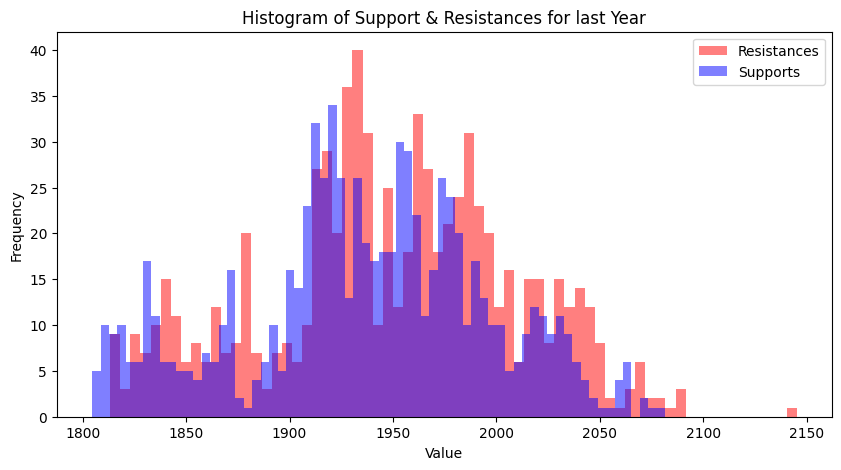

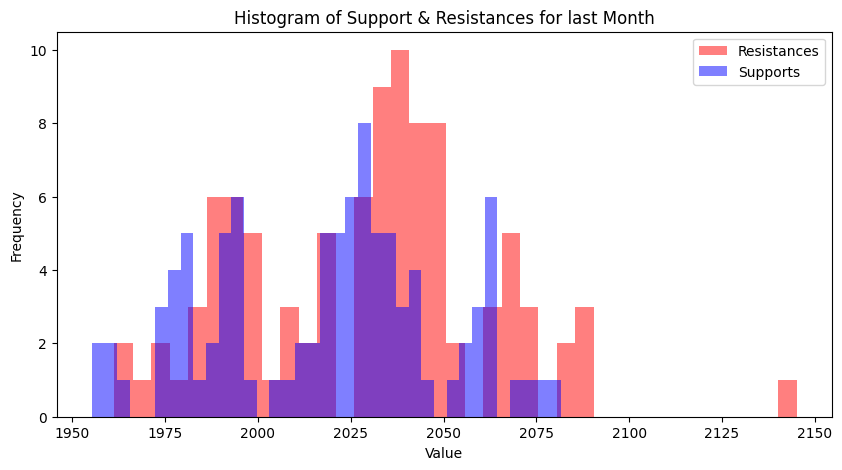

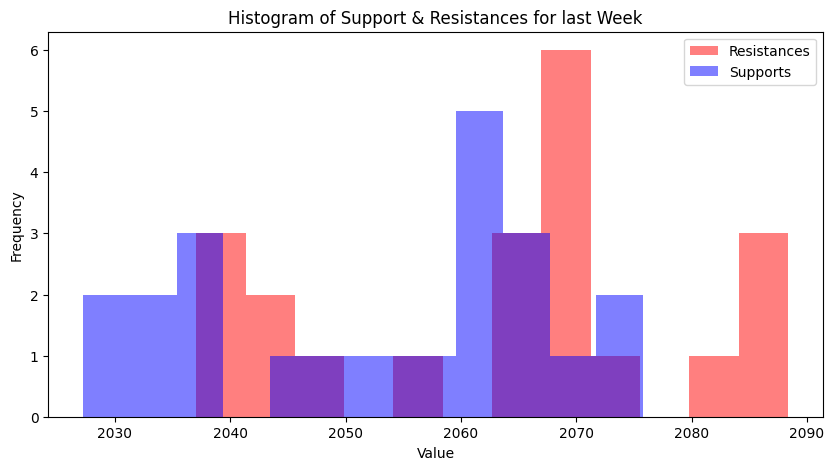

In [8]:
import numpy as np
import matplotlib.pyplot as plt

print(len(df['support']))
print(len(df['resistance']))

df_year = df #[-5000:-1]
df_month = df[-2880:-1] #[-5000:-1]
df_week = df[-672:-1]

bin_width = 5
bins_year = int((df_year['resistance'].max() - df_year['support'].min())/bin_width)
bins_month = int((df_month['resistance'].max() - df_month['support'].min())/bin_width)
bins_week = int((df_week['resistance'].max() - df_week['support'].min())/bin_width)

plt.figure(figsize=(10,5))
plt.hist(df_year['resistance'], bins=bins_year, alpha=0.5, label="Resistances", color='red')
plt.hist(df_year['support'], bins=bins_year, alpha=0.5, label="Supports", color='blue')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Support & Resistances for last Year')
plt.legend()

plt.figure(figsize=(10,5))
plt.hist(df_month['resistance'], bins=bins_month, alpha=0.5, label="Resistances", color='red')
plt.hist(df_month['support'], bins=bins_month, alpha=0.5, label="Supports", color='blue')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Support & Resistances for last Month')
plt.legend()

plt.figure(figsize=(10,5))
plt.hist(df_week['resistance'], bins=bins_week, alpha=0.5, label="Resistances", color='red')
plt.hist(df_week['support'], bins=bins_week, alpha=0.5, label="Supports", color='blue')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Support & Resistances for last Week')
plt.legend()




230.247200951308
220.36586176664213
11
0.841845140032949


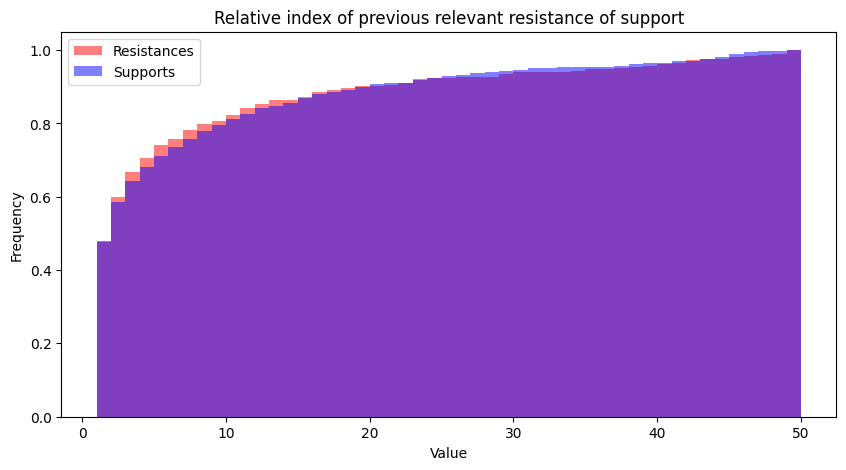

In [9]:
resistance_non_nan = df['resistance'].dropna().to_numpy()
support_non_nan = df['support'].dropna().to_numpy()

resistance_indices = df['resistance'].dropna().index.to_numpy()
support_indices = df['support'].dropna().index.to_numpy()

nb_previous_in_range_resistance = [] #[None] * len(resistance_non_nan)
nb_previous_in_range_support = [] #[None] * len(support_non_nan)

for index, row in enumerate(resistance_non_nan):
    for i in range(index - 1, 0, -1):
        if(resistance_non_nan[i] >= resistance_non_nan[index] - bin_width/2 and resistance_non_nan[i] <= resistance_non_nan[index] + bin_width/2):
            nb_previous_in_range_resistance.append(index-i)
            break

for index, row in enumerate(support_non_nan):
    for i in range(index - 1, 0, -1):
        if(support_non_nan[i] >= support_non_nan[index] - bin_width/2 and support_non_nan[i] <= support_non_nan[index] + bin_width/2):
            nb_previous_in_range_support.append(index-i)
            break        


range_limit = 50

nb_previous_in_range_resistance = [nb for nb in nb_previous_in_range_resistance if 0 <= nb <= range_limit]
nb_previous_in_range_support = [nb for nb in nb_previous_in_range_support if 0 <= nb <= range_limit]
bins = max(max(nb_previous_in_range_support), max(nb_previous_in_range_resistance)) - min(min(nb_previous_in_range_support), min(nb_previous_in_range_resistance))

plt.figure(figsize=(10,5))
counts, bins, patches = plt.hist(nb_previous_in_range_resistance, density = True, cumulative=True, bins = bins, alpha=0.5, label="Resistances", color='red')
plt.hist(nb_previous_in_range_support, density = True, cumulative=True, bins = bins, alpha=0.5, label="Supports", color='blue')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Relative index of previous relevant resistance of support')
plt.legend()

nb_of_relevent_res_sup = 5
candel_res = np.zeros(len(resistance_indices)-nb_of_relevent_res_sup)
candel_sup = np.zeros(len(support_indices)-nb_of_relevent_res_sup)

for i in range(nb_of_relevent_res_sup-1, len(resistance_indices)):
    candel_res[i-nb_of_relevent_res_sup] = resistance_indices[i] - resistance_indices[i-nb_of_relevent_res_sup]

for i in range(nb_of_relevent_res_sup-1, len(support_indices)):
    candel_sup[i-nb_of_relevent_res_sup] = support_indices[i] - support_indices[i-nb_of_relevent_res_sup]

# print(resistance_indices)
# print(resistance_indices)

print(candel_res.mean() + 2 * candel_res.std()) # 95% 
print(candel_sup.mean() + 2 * candel_sup.std()) # 95% 

print(np.argmax(counts>=0.85))
print(counts[10])

